In [38]:
import numpy as np
import pandas as pd
import math
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
import lightgbm as lgb

In [2]:
X_train=pd.read_excel("/content/X_train.xlsx")
X_train

,Jurisdiction,CoverageType,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,limit_type,Limit_val,Deductible_type,Deductible_val
0,1,0,25,1921,4,114,2,726,12,1189760,1,2500
1,6,0,25,1992,3,102,1,477,12,5613630,0,1000
2,6,0,27,1945,3,91,1,543,12,265200,0,2500
3,6,0,25,1989,2,114,1,943,12,76526424,1,2500
4,3,0,16,1900,3,91,1,845,2,1,0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...
6243,1,0,25,1910,3,114,1,726,12,757120,1,2500
6244,3,0,10,1900,3,102,1,754,12,352964,0,2500
6245,6,0,10,1900,8,107,3,338,3,276383384,0,1000
6246,6,0,25,1986,4,112,3,568,12,5757075,0,1000


In [3]:
X_test=pd.read_excel("/content/X_test.xlsx")
X_test

,Jurisdiction,CoverageType,InjuryCause,YearBuilt,Stories,ClassCode,ConstructionTypeDesc,ZipCode,limit_type,Limit_val,Deductible_type,Deductible_val
0,1,0,25,1964,3,114,2,726,12,7390272,0,2500
1,5,0,25,1900,2,102,1,1020,12,1035000,0,2500
2,6,0,25,1947,3,107,2,562,12,2737469,0,1000
3,6,0,27,1950,3,107,2,362,12,3655808,0,2500
4,5,0,27,1960,2,102,1,1082,2,1,0,25000
...,...,...,...,...,...,...,...,...,...,...,...,...
1558,6,0,12,1991,2,114,3,91,12,766257,0,1000
1559,0,0,10,1986,2,102,1,713,12,90878736,4,5
1560,5,0,25,1985,1,128,2,625,12,32331208,0,1000
1561,6,0,25,1980,2,102,2,258,12,151188544,0,1000


In [4]:
y_train=pd.read_excel("/content/y_train.xlsx")
y_train

,Amount
0,1299.55
1,5632.42
2,3827.70
3,3122.60
4,391.46
...,...
6243,33057.03
6244,33273.64
6245,381.10
6246,8958.24


In [5]:
y_test=pd.read_excel("/content/y_test.xlsx")
y_test

,Amount
0,0.00
1,14299.67
2,3456.06
3,28376.08
4,187.50
...,...
1558,3458.88
1559,5571.64
1560,300.30
1561,22273.09


**1. Linear Regression**

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

171174.0245917222

In [8]:
R2= r2_score(y_test, y_pred)
R2

0.049437281515329

**2. LightGBM**

In [9]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

In [10]:
params = {
    'objective': 'regression',
    'metric': ['l1', 'l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    'max_depth': 8,
    'num_leaves': 128,
    'max_bin': 512,
    'num_boost_round': 100000,
    'early_stopping_round': 500,
}

In [11]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [12]:
model = lgb.train(params, train_data, valid_sets=[test_data])
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

array([11970.8357152 , 22568.73892007, 13270.57849593, ...,
       19622.49652588, 14716.52442955, 15211.02439851])

In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

162489.28994062636

In [14]:
R2= r2_score(y_test, y_pred)
R2

0.14344641873728226

**3. CATBoost**

In [15]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


In [16]:
from catboost import CatBoostRegressor

In [17]:
cbr = CatBoostRegressor(iterations=100,
                        depth=5,
                        learning_rate=0.01,
                        loss_function='RMSE',
                        verbose=0)
cbr.fit(X_train, y_train)
y_pred = cbr.predict(X_test)
y_pred

array([20644.29608648, 23763.7012465 , 20504.25118638, ...,
       19978.72699843, 19985.66859168, 23818.92338577])

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

163392.34126180073

In [19]:
R2=r2_score(y_test, y_pred)
R2

0.13389918912951237

**4. XGBoost**

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
y_pred = xgr.predict(X_test)
y_pred

array([13737.553, 20211.293,  5442.443, ..., 32560.656,  5453.97 ,
        6664.998], dtype=float32)

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

120625.54737288544

In [23]:
R2=r2_score(y_test, y_pred)
R2

0.5279547328198706

**5. Random Forest**

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred

<ipython-input-25-dba6e765d798>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


array([18528.2454    , 15144.25756667,  5725.84125   , ...,
       28651.16135   ,  7210.9085    , 12916.959     ])

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

141381.762440298

In [27]:
R2=r2_score(y_test, y_pred)
R2

0.3515270933401303

**Important Features(XGBoost)**

In [30]:
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]
feature_names = X_train.columns
print(feature_names)

Index(['Jurisdiction', 'CoverageType', 'InjuryCause', 'YearBuilt', 'Stories',
       'ClassCode', 'ConstructionTypeDesc', 'ZipCode', 'limit_type',
       'Limit_val', 'Deductible_type', 'Deductible_val'],
      dtype='object')


In [35]:
#feature_importances = xgr.feature_importances(importance_type='split')
feature_importances = xgr.feature_importances_

In [36]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

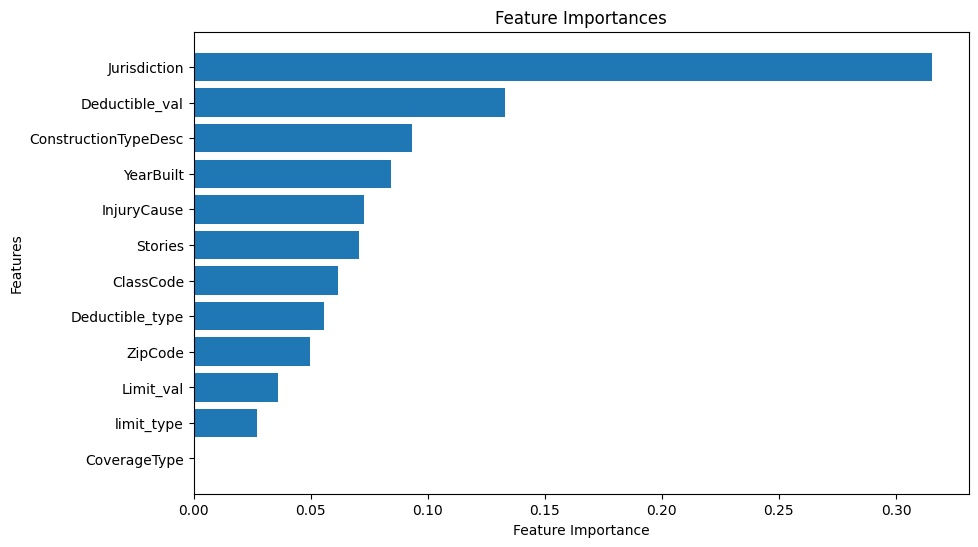

In [39]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

**KFold cross validation**

**1. LightGBM**

In [40]:
from sklearn.model_selection import KFold
from lightgbm import Dataset

In [41]:
num_folds = 8
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
y_pred = np.zeros(len(X_train))

In [42]:
params = {
    'objective': 'regression',
    'metric': ['l1', 'l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    'max_depth': 8,
    'num_leaves': 128,
    'max_bin': 512,
    'num_boost_round': 100000,
    'early_stopping_round': 500,
    'verbosity': 100,
}

In [43]:
for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    train_data = lgb.Dataset(X_train_fold, label=y_train_fold)
    valid_data = lgb.Dataset(X_val_fold, label=y_val_fold, reference=train_data)

In [48]:
model = lgb.train(params, train_data, valid_sets=[valid_data], num_boost_round=1000)
y_pred = model.predict(X_val_fold)

[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM] [Warning] verbosity is set=100, verbose=0 will be ignored. Current value: verbosity=100
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.888482
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.225870
[LightGBM] [Debug] init for col-wise cost 0.000406 seconds, init for row-wise cost 0.000518 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1320
[LightGBM] [Info] Number of data points in the train

In [49]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

86655.14176834293

In [50]:
R2= r2_score(y_val_fold, y_pred)
R2

0.2143009976164496

**2. CATBoost**

In [52]:
cbr.fit(X_train_fold, y_train_fold)
y_pred = cbr.predict(X_val_fold)
y_pred

array([ 29584.96494919,  27132.28777106,  20304.08340181,  54125.15733478,
        20337.70585685,  79281.22634874,  20378.38714883,  77814.41121608,
        69613.15045611,  19860.40143033,  23781.63447351,  24832.53850916,
        20333.18706944,  24060.78481515,  73138.94416105,  25766.72963475,
        20299.32987812,  22703.95499412,  20455.98555221,  20061.87591342,
        69144.84772021,  20795.46297036,  20809.30155154,  29709.2822769 ,
        20833.10347589,  79144.98034585,  74636.59642398,  20557.9045652 ,
        35501.56262292,  23741.38747704,  63970.72885502,  20488.26928912,
        20321.77411193,  20469.0314202 ,  20489.9043597 ,  20279.46915565,
        20492.20291578,  19972.25083951,  73572.54551052,  20338.42438957,
       163212.81916538,  20408.62364759,  20571.0921629 ,  31380.17715722,
        20612.75729746,  27321.94030921,  69881.96238155,  20411.60438553,
        20846.57322683,  20180.66820559,  20517.33442988,  20453.35019001,
        20344.91396422,  

In [53]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

90275.36070685067

In [55]:
R2= r2_score(y_val_fold, y_pred)
R2

0.1472808971745756

**3. XGBoost**

In [56]:
xgr = XGBRegressor()
xgr.fit(X_train_fold, y_train_fold)
y_pred = xgr.predict(X_val_fold)
y_pred

array([ 1.90945587e+02, -1.76445569e+03,  1.41594658e+04, -2.23271074e+04,
        1.62257812e+04,  3.88690820e+04,  5.42887842e+03,  1.81380250e+05,
        7.74324766e+04, -9.28786816e+03,  3.00784497e+03, -6.45124902e+03,
        7.79896045e+03,  3.03403672e+04,  7.60101797e+04,  2.90560898e+04,
        4.84440674e+03,  3.97977319e+03,  2.63840820e+04,  6.99966406e+03,
        4.18973625e+05,  1.31500488e+04,  4.38932373e+03,  7.13006104e+03,
        9.18660547e+03,  3.17991699e+04, -1.97801484e+04,  1.29899033e+04,
        1.85913945e+04,  5.34715137e+03,  2.61307559e+04,  5.56165918e+03,
        1.50404414e+04,  1.01043252e+04,  8.10650049e+03,  9.16002441e+03,
        1.08485703e+04,  1.17546016e+04,  1.14622852e+05,  2.44071660e+04,
        1.66736906e+05, -4.78170349e+02,  1.33887109e+04,  1.37995967e+04,
        8.05622217e+03,  6.75697031e+04,  2.96021172e+04,  1.11818623e+04,
        4.48401221e+03,  7.46417676e+03,  7.86937549e+03,  1.31848496e+04,
        3.13234814e+03,  

In [57]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

96080.67146631384

In [58]:
R2= r2_score(y_val_fold, y_pred)
R2

0.03408349630826013

**4. Random Forest**

In [59]:
rf_model.fit(X_train_fold, y_train_fold)
y_pred = rf_model.predict(X_val_fold)
y_pred

<ipython-input-59-b00cc67ef332>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_fold, y_train_fold)


array([2.42160187e+03, 1.84712571e+04, 1.66761900e+04, 8.79500470e+03,
       1.64425713e+04, 1.84021603e+05, 7.80752779e+03, 1.67210448e+05,
       6.34578961e+04, 4.68147075e+03, 3.85185800e+03, 1.22885496e+04,
       8.13815845e+03, 1.19160035e+04, 2.10503894e+05, 1.93318288e+04,
       8.20701733e+03, 1.89996900e+03, 7.67268050e+03, 6.51809877e+03,
       1.73718387e+05, 1.75756350e+04, 4.46168180e+03, 4.63555449e+03,
       3.11082287e+03, 6.21218839e+04, 3.46422724e+04, 1.17175363e+04,
       1.30255188e+04, 3.23121110e+03, 2.01627697e+04, 7.36430490e+03,
       8.25310530e+03, 1.51604168e+04, 8.22245510e+03, 1.85091828e+04,
       1.08550037e+04, 1.70946309e+03, 7.62083818e+04, 4.24056120e+03,
       1.31207850e+05, 7.41795405e+03, 5.64999438e+03, 8.01610040e+03,
       1.45275586e+04, 2.83532736e+04, 4.12222940e+04, 6.26272463e+03,
       1.55727927e+04, 5.99720318e+03, 1.19077460e+03, 3.81603700e+03,
       3.07899700e+03, 1.27376121e+04, 3.28749570e+03, 3.12181090e+03,
      

In [62]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

134798.5605598226

In [61]:
R2= r2_score(y_val_fold, y_pred)
R2

-0.9012447891301649

**Important Features(KFold LightGBM)**

In [67]:
feature_importances = model.feature_importance(importance_type='split')

In [68]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

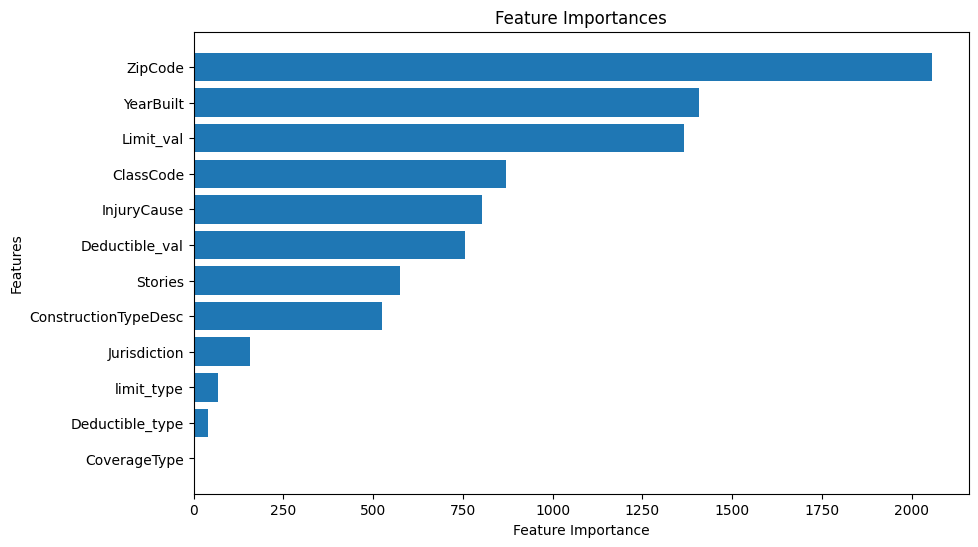

In [69]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

**Ensemble method**

**1. XGBoost-CatBoost**

In [70]:
from sklearn.ensemble import VotingRegressor

In [83]:
ensemble = VotingRegressor(estimators=[('xgb', xgr), ('catboost', cbr)], weights=[0.5, 0.5])
ensemble.fit(X_train_fold, y_train_fold)
y_pred = ensemble.predict(X_val_fold)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 14887.95526818,  12683.91604129,  17231.77461106,  15899.02495645,
        18281.74355342,  59075.15418999,  12903.6327834 , 129597.33060804,
        73522.8135093 ,   5286.26663313,  13394.73972211,   9190.64474286,
        14066.07375933,  27200.57600132,  74574.56192428,  27411.40973925,
        12571.8683082 ,  13341.86409374,  23420.03379173,  13530.76998796,
       244059.23636011,  16972.75589924,  12599.312641  ,  18419.67165603,
        15009.85447232,  55472.07513386,  27428.22399324,  16773.90394275,
        27046.47857709,  14544.26942211,  45050.7423572 ,  13024.9642344 ,
        17681.10775909,  15286.67830776,  14298.20242399,  14719.74678486,
        15670.38661414,  15863.42620101,  94097.69853651,  22372.7952026 ,
       164974.86270769,   9965.22664924,  16979.9015502 ,  22589.88691845,
        14334.48973272,  47445.8217171 ,  49742.03978453,  15796.73334511,
        12665.29271693,  13822.4224817 ,  14193.35495908,  16819.09989969,
        11738.63105437,  

In [84]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

88196.37599152063

In [85]:
R2= r2_score(y_val_fold, y_pred)
R2

0.18610382402873127

**2. XGboost-lightgbm**

In [74]:
lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=5)
ensemble = VotingRegressor(estimators=[('xgb', xgr), ('lightgbm', lgb)], weights=[0.5, 0.5])
ensemble.fit(X_train_fold, y_train_fold)
y_pred = ensemble.predict(X_val_fold)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 5467, number of used features: 12
[LightGBM] [Info] Start training from score 37240.568757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

array([ 6.78772881e+03,  2.09504263e+04,  1.21442750e+04, -5.28623029e+04,
        1.34099452e+04,  7.77612159e+04,  7.27644109e+03,  1.50705079e+05,
        6.72827831e+04,  1.39720748e+03,  7.01321588e+03,  5.15472183e+04,
        8.80765186e+03,  2.43181655e+04,  9.67187593e+04,  1.81852945e+04,
        7.98794403e+03,  7.04890413e+03,  1.08810252e+04,  7.28415042e+03,
        2.84882451e+05,  1.31473440e+04,  6.77568587e+03,  5.69347403e+03,
        9.43265066e+03,  5.03369323e+04,  4.76541660e+04,  1.20208706e+04,
        1.27416411e+04,  8.18286908e+03,  3.44508632e+04,  7.36185360e+03,
        1.20324210e+04,  1.10740529e+04,  9.80674434e+03,  9.51128093e+03,
        1.15913384e+04,  1.08046700e+04,  1.01022864e+05,  1.83271158e+04,
        2.18458507e+05,  5.03967141e+03,  1.20325210e+04,  1.21673934e+04,
        1.04397478e+04,  1.02051765e+05,  7.18164520e+04,  1.13563023e+04,
        1.45914638e+04,  9.00398716e+03,  9.75700556e+03,  1.29786367e+04,
        6.07837437e+03,  

In [75]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

91098.08517506925

In [76]:
R2= r2_score(y_val_fold, y_pred)
R2

0.13166756335207386

**3. LightGBM-CatBoost**

In [77]:
ensemble = VotingRegressor(estimators=[('catboost', cbr), ('lightgbm', lgb)], weights=[0.5, 0.5])
ensemble.fit(X_train_fold, y_train_fold)
y_pred = ensemble.predict(X_val_fold)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 5467, number of used features: 12
[LightGBM] [Info] Start training from score 37240.568757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

array([ 21484.73849088,  35398.79805125,  15216.58379055, -14636.17054942,
        15465.90754125,  97967.28809287,  14751.19545134,  98922.15998993,
        63373.12007279,  15971.34228065,  17400.11063135,  67189.112076  ,
        15074.76516981,  21178.37426472,  95283.1415611 ,  16540.61441496,
        15715.40559793,  16410.99503492,   7916.97699099,  13815.25634929,
       109968.06263228,  16970.0510782 ,  14985.67478336,  16983.08464765,
        15255.89965917,  74009.83747316,  94862.53845357,  15804.87122789,
        21196.72510642,  17379.98713312,  53370.84966438,  14825.15865215,
        14673.08734969,  16256.40603237,  15998.44628022,  15071.00329592,
        16413.15467341,  14913.49468772,  80497.71072877,  16292.74501753,
       216696.46304006,  15483.06840841,  15623.71158524,  20957.68361027,
        16718.01532018,  81927.88366092,  91956.37462006,  15971.17336429,
        22772.7443565 ,  15362.23288118,  16080.98502918,  16612.887016  ,
        14684.65727583,  

In [78]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

90078.7502529034

In [79]:
R2= r2_score(y_val_fold, y_pred)
R2

0.15099112159357309

**CatBoost-LightGBM-XgBoost Ensembled KFold**

In [80]:
ensemble = VotingRegressor(estimators=[('xgb', xgr), ('catboost', cbr), ('lightgbm', lgb)], weights=[0.3, 0.3, 0.4])
ensemble.fit(X_train_fold, y_train_fold)
y_pred = ensemble.predict(X_val_fold)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 5467, number of used features: 12
[LightGBM] [Info] Start training from score 37240.568757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

array([ 14286.57797393,  25076.47295735,  14390.69843835, -23819.58439957,
        15206.68982232,  82106.43244879,  11391.78117158, 125770.36187033,
        66966.92398137,   8004.67323227,  12444.27854894,  49332.66110285,
        12366.18156367,  23638.73108651,  91715.67273902,  19372.64552162,
        11995.71351202,  12052.33248653,  12203.20764695,  11145.91670684,
       206752.0528338 ,  15441.50921397,  11224.40679068,  12754.55780098,
        12877.39102037,  60833.12292051,  62492.32658921,  14485.07752188,
        18984.64218222,  13133.99636895,  44138.83360381,  11479.79774671,
        14218.42489043,  13989.51924247,  13181.71673469,  12776.86304539,
        14335.8745409 ,  13459.95113497,  91427.76950071,  18322.50337975,
       207056.96039051,  10202.14125723,  14458.47333315,  17768.0081764 ,
        13730.00317679,  83081.02383531,  75457.53861414,  14090.33694429,
        17478.74182463,  12510.97251173,  13173.86722684,  15200.42947661,
        10652.9388676 ,  

In [81]:
mse = mean_squared_error(y_val_fold, y_pred)
rmse = np.sqrt(mse)
rmse

88617.39067156713

In [82]:
R2= r2_score(y_val_fold, y_pred)
R2

0.17831483947287086

**Important Features(XGBoost-CatBoost)**

In [90]:
xgb_feature_importances = xgr.feature_importances_
catboost_feature_importances = cbr.get_feature_importance()

In [91]:
weight_xgb = 0.6
weight_catboost = 0.4
ensemble_feature_importances = (weight_xgb * xgb_feature_importances + weight_catboost * catboost_feature_importances) / (weight_xgb + weight_catboost)

In [93]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': ensemble_feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

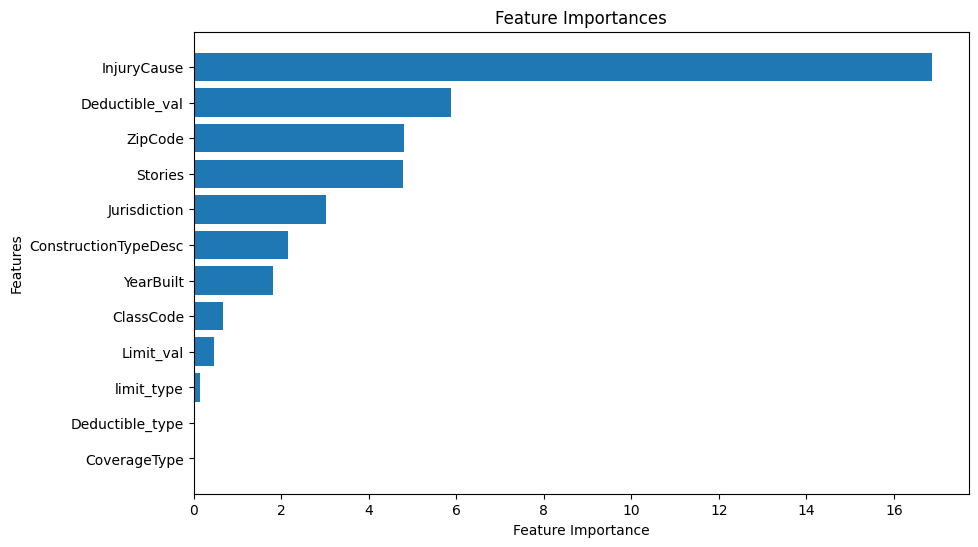

In [94]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

**Auto ML**

**1. Auto Keras**

In [95]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 54.2 MB/s eta 0:00:00


In [96]:
import autokeras as ak
from tensorflow.keras import layers

Using TensorFlow backend


In [97]:
reg = ak.StructuredDataRegressor(max_trials=5, overwrite=True)

In [98]:
#reg = ak.StructuredDataRegressor(max_trials=8)
reg.fit(X_train, y_train, epochs=8)
#y_pred = reg.evaluate(X_test, y_test)
y_pred = reg.predict(X_test)
# rf_model.fit(X_train, y_train)
# y_pred = rf_model.predict(X_test)
y_pred

Trial 5 Complete [00h 00m 13s]
val_loss: 10812872704.0

Best val_loss So Far: 9738216448.0
Total elapsed time: 00h 01m 09s
Epoch 1/8
196/196 [==============================] - 2s 4ms/step - loss: 33405067264.0000 - mean_squared_error: 33405067264.0000
Epoch 2/8
196/196 [==============================] - 1s 3ms/step - loss: 33259563008.0000 - mean_squared_error: 33259563008.0000
Epoch 3/8
196/196 [==============================] - 1s 6ms/step - loss: 32844802048.0000 - mean_squared_error: 32844802048.0000
Epoch 4/8
196/196 [==============================] - 1s 6ms/step - loss: 32320112640.0000 - mean_squared_error: 32320112640.0000
Epoch 5/8
196/196 [==============================] - 1s 5ms/step - loss: 31938500608.0000 - mean_squared_error: 31938500608.0000
Epoch 6/8
196/196 [==============================] - 1s 3ms/step - loss: 31746762752.0000 - mean_squared_error: 31746762752.0000
Epoch 7/8
196/196 [==============================] - 1s 3ms/step - loss: 31664689152.0000 - mean_square

array([[48760.58  ],
       [49620.47  ],
       [15366.4795],
       ...,
       [18267.654 ],
       [15189.567 ],
       [26591.55  ]], dtype=float32)

In [99]:
y_pred

array([[48760.58  ],
       [49620.47  ],
       [15366.4795],
       ...,
       [18267.654 ],
       [15189.567 ],
       [26591.55  ]], dtype=float32)

In [100]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

173671.95864190764

**H2O**

In [103]:
import h2o
from h2o.automl import H2OAutoML

In [102]:
pip install H2O

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for H2O: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=01676189d8d2b05784ce59bcdbcec4bdb6a4aa534821d91f0e66c04ee1e52491
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built H2O


In [104]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdw_k09hf
  JVM stdout: /tmp/tmpdw_k09hf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdw_k09hf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_edw6m0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [105]:
X_train_h2o = h2o.H2OFrame(X_train)
y_train_h2o = h2o.H2OFrame(y_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [108]:
aml = H2OAutoML(max_models=5, seed=1)
aml.train(x=X_train_h2o.columns, y=y_train_h2o.columns[0], training_frame=X_train_h2o)

H2OValueError: ignored